In [ ]:
function ConnectButton(){
  console.log("Connect pushed");
  document.querySelector("#top-toolbar > colab-connectbutton").shadowRoot.querySelector("#connect").click()
}
var colab = setInterval(ConnectButton,300000);

In [ ]:
!pip install paddlepaddle-gpu==2.4.2.post117 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
!pip install paddleocr

In [ ]:
!git clone https://github.com/PaddlePaddle/PaddleOCR
!pip install -r /content/PaddleOCR/requirements.txt

In [ ]:
!pip install fastapi nest-asyncio pyngrok uvicorn

In [4]:
!ngrok config add-authtoken 2RD3s7IecoT14nPwcYYUk7VmxZs_69qfmAW7jdYTCrsoejav1

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [76]:
# detect

!python3 PaddleOCR/tools/infer_det.py -c det_mv3_db.yml -o Global.infer_img="/content/images/img1.png" PostProcess.box_thresh=0.6 PostProcess.unclip_ratio=2.0

/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr

mkdir: cannot create directory ‘croped_images’: File exists


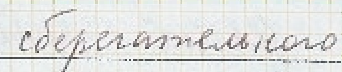

In [28]:
import json
from PIL import Image
import cv2

data = {}
with open("/content/output/det_db/predicts_db.txt") as f:
    filename, json_str = f.read().split('\t')
    data = json.loads(json_str)


image_boxes = []
for obj in data:
    image_boxes.append(obj['points'])


!mkdir croped_images
origin = Image.open("/content/det_ex.png")
images = []
ctr = 0
for idx, box in enumerate(image_boxes):
    x1, y1 = box[0]
    x2, y2 = box[2]
    if x2 - x1 < 35 or y2 - y1 < 15:
        continue
    origin.crop((x1, y1, x2, y2)).save(f"croped_images/img{ctr}.png")
    ctr += 1

Image.open('croped_images/img1.png').show()

In [44]:
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision.models import mobilenet_v3_large

class ClassifierMobileNetV3(nn.Module):
    def __init__(self, num_classes=3):
        super(ClassifierMobileNetV3, self).__init__()

        # Load the pre-trained MobileNetV3 model
        self.model = mobilenet_v3_large(pretrained=True)

        # Replace last layer to match desired number of classes
        num_features = self.model.classifier[-1].in_features

        # Define custom classifier layer for our 3-class problem.
        self.model.classifier[-1] = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.model(x)

# Initialize the model and print its structure
model = ClassifierMobileNetV3()
model.load_state_dict(torch.load('/content/classifier.pth'))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [ ]:
import os
from torchvision.transforms import Resize, ToTensor, Normalize, ToPILImage
import numpy as np
import torch


def prepare_img(img):
    tr1 = transforms.ToPILImage()
    tr2 = transforms.Resize((224, 224)),
    tr3 = transforms.ToTensor(),
    tr4 = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224 , 0.225])
    # img = tr1(img)
    print(img)
    img = tr2(img)
    img = img.convert('RGB')
    img = tr3(img)
    img = tr4(img)
    return img





In [111]:
# recognize
!python3 PaddleOCR/tools/infer_rec.py -c rec_cyrillic_lite_train.yml -o Global.pretrained_model=lite_ocr  Global.infer_img=rus_text.jpg

/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr

In [63]:
!mkdir images

In [120]:
with open('/content/preds.txt') as f:
    print(f.read().split('\n')[-3].split('\t')[1].strip()[8:])

Линейное


In [126]:

!python3 PaddleOCR/tools/infer_det.py -c det_mv3_db.yml -o Global.infer_img="/content/det_ex.png" PostProcess.box_thresh=0.6 PostProcess.unclip_ratio=2.0

/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr

In [133]:
import cv2
from PIL import Image
import numpy as np


def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):

    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow

        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()

    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)

        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf


def get_binary(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    # gray = cv2.GaussianBlur(gray, (3, 3), 0)
    ret, thresh = cv2.threshold(gray, np.mean(gray) * 0.4, 255, cv2.THRESH_BINARY)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    image = 255 - cv2.erode(255-thresh,kernel,iterations = 1)

    image = 255 - cv2.dilate(255 - image, kernel, iterations = 1)

    return image

In [144]:
def get_contours(image_path):
    image = cv2.imread(image_path)
    image = apply_brightness_contrast(image, 0, 64)
    overlay = Image.new("RGB",
                        (image.shape[1] + 20, image.shape[0] + 20),
                        (255, 255, 255)).convert('L')

    overlay.paste(Image.fromarray(image), (10, 10))
    overlay = np.asarray(overlay)

    contours, hierarchy = cv2.findContours(overlay, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    filtered_contours = []
    for i, contour in enumerate(contours):
        # Calculate the contour area
        area = cv2.contourArea(contour)

        # Exclude the outermost contour based on the area
        if area < (image.shape[0] * image.shape[1]) - image.shape[0] * 2 - image.shape[1] * 2 + 4:
            filtered_contours.append(contour)


    overlay2 = cv2.cvtColor(overlay, cv2.COLOR_GRAY2RGB)
    Image.fromarray(overlay2).show()
    cv2.drawContours(overlay2, filtered_contours, -1, (0,255,0), 1)

    result = []
    for contour in filtered_contours:
        result.append(([el[0][0] for el in contour], [el[0][1] for el in contour]))
    return result

In [137]:
!pip install py_asciimath

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=a0a0c1ec2f5ae1fe4f0df27cf475e5b4359e6468208cedfcfdafe8ed90a7f645
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [147]:
import requests
import json
import hmac
import hashlib
from py_asciimath.translator.translator import MathML2Tex

def make_strokes(strokes):
    strs = []
    for xs, ys in strokes:
        strs.append({
            "x": [int(x) for x in xs],
            "y": [int(y) for y in ys]
        })
    return strs


def get_hmack(apl_key, hmac_key, data):
    user_key = apl_key + hmac_key
    result = hmac.new(user_key.encode("utf-8"),
                      msg=data.encode("utf-8"),
                      digestmod=hashlib.sha512).hexdigest()
    return data, result



def recognise_formula(image_path):
    data = {
        "xDPI": 96,
        "yDPI": 96,
        "contentType": "Math",
        "configuration": {
            "math.solver.enable": False,
            "export.jiix.strokes": False,
        },
        "strokeGroups": [
            {
                "strokes": [
                    {
                        #"id": "0",  # optional
                        "x": [
                            1, 2, 3, 4
                        ],
                        "y":[
                            1, 2, 3, 4
                        ]
                    }
                ]
            }
        ]
    }

    data["strokeGroups"][0]["strokes"] = make_strokes(get_contours(image_path))

    data, hmac = get_hmack("6a76edca-0696-495b-b877-892b9aa0af6b", "0a6c60d5-c912-4b5e-b4aa-773b6f586b9a", json.dumps(data))


    headers = {
        "Content-Type": "application/json",
        "Accept": "application/mathml+xml, application/json",
        "applicationKey": "6a76edca-0696-495b-b877-892b9aa0af6b",
        "hmac": hmac,
    }

    # session = requests.Session()

    response = requests.post("https://cloud.myscript.com/api/v4.0/iink/batch",
                            data=data,
                            headers=headers)
    mathml2tex = MathML2Tex()
    parsed = mathml2tex.translate(response.text, network=True, from_file=False,)
    return parsed

In [160]:
from fastapi import FastAPI, Request
import nest_asyncio
from pyngrok import ngrok
import uvicorn
import base64
import os
import time
from paddleocr import PaddleOCR


app = FastAPI()

@app.post('/process')
async def home(request: Request):
    !rm -rf /content/images
    !rm -rf /content/croped_images
    !mkdir /content/images
    !mkdir /content/croped_images
    images = await request.json()
    print(images)


    for idx, b64image in images.items():
        with open(f"images/img{idx}.png", "wb") as f:
            f.write(base64.b64decode(b64image.encode('utf-8')))


    ctr = 0
    for filename in os.listdir("images"):
        print(filename)
        os.system(f'python3 PaddleOCR/tools/infer_det.py -c det_mv3_db.yml -o Global.infer_img="images/{filename}" PostProcess.box_thresh=0.6 PostProcess.unclip_ratio=2.0')
        time.sleep(10)

        data = {}
        with open("/content/output/det_db/predicts_db.txt") as f:
            img_filename, json_str = f.read().split('\t')
            data = json.loads(json_str)

        image_boxes = []
        for obj in data:
            image_boxes.append(obj['points'])


        origin = Image.open(f"/content/images/{filename}")
        images = []

        for idx, box in enumerate(image_boxes):
            x1, y1 = box[0]
            x2, y2 = box[2]
            if x2 - x1 < 35 or y2 - y1 < 15:
                continue
            origin.crop((x1, y1, x2, y2)).save(f"/content/croped_images/img{ctr}.png")
            ctr += 1


    images = []
    for filename in sorted(list(os.listdir('/content/croped_images'))):
        if not filename.endswith('.png'):
            continue
        img = Image.open(f'/content/croped_images/{filename}')
        img = img.resize((224, 224))
        img = ToTensor()(img)
        img = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224 , 0.225])(img)
        images.append((img, f'/content/croped_images/{filename}'))

    model.eval()
    result = []
    for img, path in images:
        outputs = model(img.reshape(1, 3, 224, 224))
        _, predicted = torch.max(outputs.data, 1)
        result.append((predicted, path))

    tokens = []
    for t, path in result:
        print(t, path)
        if t == 0:
            os.system(f'python3 PaddleOCR/tools/infer_rec.py -c rec_cyrillic_lite_train.yml -o Global.pretrained_model=lite_ocr  Global.infer_img={path} > /content/preds.txt')
            time.sleep(7)
            with open('/content/preds.txt') as f:
                tokens.append({"type": 0,
                                "data": f.read().split('\n')[-3].split('\t')[1].strip()[8:].strip()
                                })
        elif t == 1:
            tokens.append({"type": 1,
                            "data": recognise_formula(path)
                            })
        else:
            with open(path, "rb") as f:
                  tokens.append({
                    "type": 2,
                    "data" : base64.b64encode(f.read()).decode("utf-8")
                    })
    d = {"data": tokens}
    print(json.dumps(d, ensure_ascii=False))
    return json.dumps(d, ensure_ascii=False)




ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

Public URL: https://92c7-34-143-255-213.ngrok-free.app


INFO:     Started server process [2230]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


{'0': '/9j/4AAQSkZJRgABAQEAeAB4AAD/4gHbSUNDX1BST0ZJTEUAAQEAAAHLAAAAAAJAAABtbnRyUkdCIFhZWiAAAAAAAAAAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLVF0BQ8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlyWFlaAAAA8AAAABRnWFlaAAABBAAAABRiWFlaAAABGAAAABR3dHB0AAABLAAAABRjcHJ0AAABQAAAAAxyVFJDAAABTAAAACBnVFJDAAABTAAAACBiVFJDAAABTAAAACBkZXNjAAABbAAAAF9YWVogAAAAAAAAb58AADj0AAADkVhZWiAAAAAAAABilgAAt4cAABjcWFlaIAAAAAAAACShAAAPhQAAttNYWVogAAAAAAAA808AAQAAAAEWwnRleHQAAAAATi9BAHBhcmEAAAAAAAMAAAACZmYAAPKnAAANWQAAE9AAAApbZGVzYwAAAAAAAAAFc1JHQgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD/2wBDAAQDAwQDAwQEAwQFBAQFBgoHBgYGBg0JCggKDw0QEA8NDw4RExgUERIXEg4PFRwVFxkZGxsbEBQdHx0aHxgaGxr/2wBDAQQFBQYFBgwHBwwaEQ8RGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhr/wgARCAFWBQADASIAAhEBAxEB/8QAGwAAAwEBAQEBAAAAAAAAAAAAAgMEAQAFBgf/xAAZAQEBAQEBAQAAAAAAAAAAAAABAAIDBAX/2gAMAwEAAhADEAAAAf3/ALuru7C3h5C4Ok+DqPg4D4Oo+

ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/protocols/http/h11_impl.py", line 428, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/middleware/proxy_headers.py", line 78, in __call__
    return await self.app(scope, receive, send)
  File "/usr/local/lib/python3.10/dist-packages/fastapi/applications.py", line 282, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.10/dist-packages/starlette/applications.py", line 122, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.10/dist-packages/starlette/middleware/errors.py", line 184, in __call__
    raise exc
  File "/usr/local/lib/python3.10/dist-packages/starlette/middleware/errors.py", line 162, in __call__
    await self.app(scope, receive, _send)
  File "/usr/local/lib/python3.10/dist-packa

{'0': 'iVBORw0KGgoAAAANSUhEUgAABcgAAAGMCAYAAADusUESAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7L0HgGzLUd/du7N59+b4kt5TRJEoyUQRbcDkpCewAOOIbYID/gwG28IGbHKUhIRyeNITUQEQSSSBhEBYCOXwnqQXbg57N8/OzH7/X1XXmZ4zZ3fnSk8Cw9S9teecnj7V1dXV1dV1+vSZ2BGkMYxhDGMYwxjGMIYxjGEMYxjDGMYwhjGMYQxjGMMY/p7BZD6OYQxjGMMYxjCGMYxhDGMYwxjGMIYxjGEMYxjDGMbw9wrGAfIxjGEMYxjDGMYwhjGMYQxjGMMYxjCGMYxhDGMYw99LGAfIxzCGMYxhDGMYwxjGMIYxjGEMYxjDGMYwhjGMYQx/L2EcIB/DGMYwhjGMYQxjGMMYxjCGMYxhDGMYwxjGMIYx/L2EcYB8DGMYwxjGMIYxjGEMYxjDGMYwhjGMYQxjGMMYxvD3EsYB8jGMYQxjGMMYxjCGMYxhDGMYwxjGMIYxjGEMYxjD30sYB8jHMIYxjGEMYxjDGMYwhjGMYQxjGMMYxjCGMYxhDH8vYWJHkM/HMIYxjGEMYxjDGMYwhjGMYQxjGMMYHhDopp10NbXTSto23FQKaX9XYKfXS+fvvictHj2UFg8fTBMTf7fXIH5qOpHPxjCGMYzh7xaMA+RjGMMYxjCGv6fQy8eA8UtVYxjDGMYwhjGM4W8R7DdTn8jHv4Wwlbrp/rSezqQNneNz/d0LO/S6vfR7P/eS9IG/eGtqzcykL/2v/yYdf/BNaXLy765P+bnphnw2hjGMYQx/t+BvJkDeG63InYYBf2LiY+AFjCqR62Dl/2HfxmGUNpv8W1SLnW4+KWCilU+uD3bqMTRBb2JYHpMNujmqRBqKaIQHtLtODJc6mYZl1FSHJj726ptlSaO6i90R6

ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/protocols/http/h11_impl.py", line 428, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/middleware/proxy_headers.py", line 78, in __call__
    return await self.app(scope, receive, send)
  File "/usr/local/lib/python3.10/dist-packages/fastapi/applications.py", line 282, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.10/dist-packages/starlette/applications.py", line 122, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.10/dist-packages/starlette/middleware/errors.py", line 184, in __call__
    raise exc
  File "/usr/local/lib/python3.10/dist-packages/starlette/middleware/errors.py", line 162, in __call__
    await self.app(scope, receive, _send)
  File "/usr/local/lib/python3.10/dist-packa

{'0': '/9j/4AAQSkZJRgABAQEAeAB4AAD/4gHbSUNDX1BST0ZJTEUAAQEAAAHLAAAAAAJAAABtbnRyUkdCIFhZWiAAAAAAAAAAAAAAAABhY3NwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9tYAAQAAAADTLVF0BQ8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlyWFlaAAAA8AAAABRnWFlaAAABBAAAABRiWFlaAAABGAAAABR3dHB0AAABLAAAABRjcHJ0AAABQAAAAAxyVFJDAAABTAAAACBnVFJDAAABTAAAACBiVFJDAAABTAAAACBkZXNjAAABbAAAAF9YWVogAAAAAAAAb58AADj0AAADkVhZWiAAAAAAAABilgAAt4cAABjcWFlaIAAAAAAAACShAAAPhQAAttNYWVogAAAAAAAA808AAQAAAAEWwnRleHQAAAAATi9BAHBhcmEAAAAAAAMAAAACZmYAAPKnAAANWQAAE9AAAApbZGVzYwAAAAAAAAAFc1JHQgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD/2wBDAAQDAwQDAwQEAwQFBAQFBgoHBgYGBg0JCggKDw0QEA8NDw4RExgUERIXEg4PFRwVFxkZGxsbEBQdHx0aHxgaGxr/2wBDAQQFBQYFBgwHBwwaEQ8RGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhoaGhr/wgARCAFWBQADASIAAhEBAxEB/8QAGwAAAwEBAQEBAAAAAAAAAAAAAgMEAQAFBgf/xAAZAQEBAQEBAQAAAAAAAAAAAAABAAIDBAX/2gAMAwEAAhADEAAAAf3/ALuru7C3h5C4Ok+DqPg4D4Oo+

INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [2230]
